# TP7 DA SILVA PEREIRA Théo

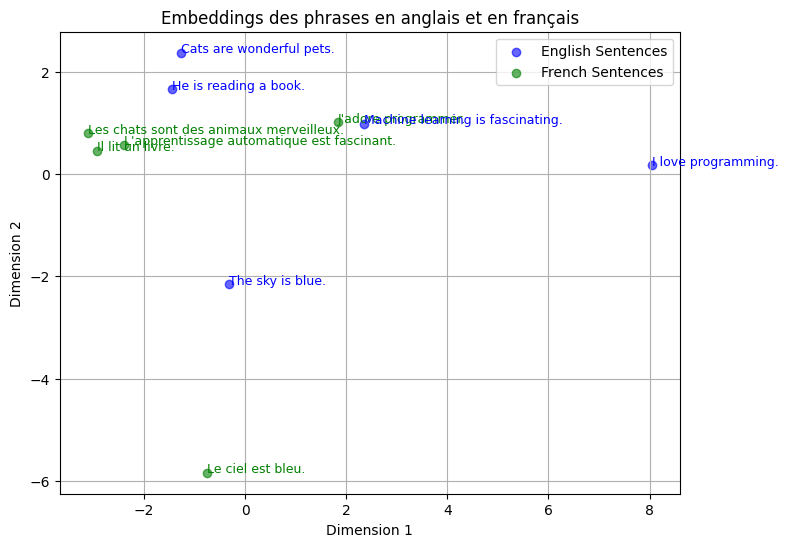

In [6]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger le tokenizer et le modèle mBERT
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Liste des phrases en anglais et leur traduction en français
sentences_english = [
    "I love programming.",
    "The sky is blue.",
    "Machine learning is fascinating.",
    "He is reading a book.",
    "Cats are wonderful pets."
]

sentences_french = [
    "J'adore programmer.",
    "Le ciel est bleu.",
    "L'apprentissage automatique est fascinant.",
    "Il lit un livre.",
    "Les chats sont des animaux merveilleux."
]

# Fonction pour extraire les embeddings moyens d'une liste de phrases
def extract_sentence_embeddings(sentences, tokenizer, model):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for sentence in sentences:
            inputs = tokenizer(sentence, return_tensors='pt', truncation=True)
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :]
            embeddings.append(cls_embedding.squeeze().numpy())
    embeddings = torch.tensor(embeddings)

    return embeddings

# Extraire les embeddings des phrases en anglais et en français
embeddings_english = extract_sentence_embeddings(sentences_english, tokenizer, model)
embeddings_french = extract_sentence_embeddings(sentences_french, tokenizer, model)

# Réduction des dimensions avec PCA pour visualisation
combined_embeddings = torch.cat((embeddings_english, embeddings_french), dim=0)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(combined_embeddings.numpy())

# Séparer les points pour anglais et français
n = len(sentences_english)
english_points = reduced_embeddings[:n]
french_points = reduced_embeddings[n:]

# Visualisation des embeddings
plt.figure(figsize=(8, 6))
plt.scatter(english_points[:, 0], english_points[:, 1], label="English Sentences", color="blue", alpha=0.6)
plt.scatter(french_points[:, 0], french_points[:, 1], label="French Sentences", color="green", alpha=0.6)
    
# Annoter les points
for i in range(n):
    plt.text(english_points[i, 0], english_points[i, 1], sentences_english[i], fontsize=9, color="blue")
    plt.text(french_points[i, 0], french_points[i, 1], sentences_french[i], fontsize=9, color="green")

# Ajouter des informations au graphique
plt.title("Embeddings des phrases en anglais et en français")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()
